In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
x_train = tf.dtypes.cast(x_train, tf.float32)
x_test = tf.dtypes.cast(x_test, tf.float32)
x_train, x_test = x_train/255., x_test/255.

# Split the training data into training and validation sets
val_split = 0.2
val_samples = int(len(x_train) * val_split)

val_images = x_train[:val_samples]
val_labels = y_train[:val_samples]

x_train = x_train[val_samples:]
y_train = y_train[val_samples:]

# Build the CNN model

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
print(model.summary())


# Train the model
history = model.fit(x_train, y_train, epochs=20,validation_data=(val_images, val_labels))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print('Test accuracy =', test_accuracy)

c:\Python\cv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3252 - loss: 1.8054 - val_accuracy: 0.5387 - val_loss: 1.2824
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5464 - loss: 1.2607 - val_accuracy: 0.5973 - val_loss: 1.1314
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6141 - loss: 1.0974 - val_accuracy: 0.6305 - val_loss: 1.0368
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6554 - loss: 0.9701 - val_accuracy: 0.6377 - val_loss: 1.0223
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6848 - loss: 0.8967 - val_accuracy: 0.6546 - val_loss: 0.9845
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7095 - loss: 0.8293 - val_accuracy: 0.6648 - val_loss: 0.9685
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7305 - loss: 0.7655 - val_accuracy: 0.6793 - val_loss: 0.9393
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7458 - loss: 0.72

In [2]:
# Predict on test data
y_pred = np.argmax(model.predict(x_test), axis=1)

# Calculate train accuracy
train_accuracy = np.max(history.history['accuracy'])
print("Train Accuracy:", train_accuracy)

#Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Calculate precision
precision = precision_score(y_test, y_pred, average='macro')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred, average='macro')
print("Recall:", recall)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Train Accuracy: 0.8772249817848206
Confusion Matrix:
 [[704  10  82  33  19  13   8  14  88  29]
 [ 41 741  19  24   5  13  14   3  40 100]
 [ 68   0 604  78  68  87  55  26   7   7]
 [ 14   3  96 516  54 214  57  29   8   9]
 [ 13   2  86 103 596  74  45  66  13   2]
 [  9   1  74 184  33 618  21  49   7   4]
 [  2   1  60  76  33  39 773   6   5   5]
 [ 26   1  43  48  79  88   5 689  10  11]
 [ 65  21  17  23  11  14   6   3 811  29]
 [ 43  62  23  33   4  14  13  20  49 739]]
Precision: 0.6898904048930407
Recall: 0.6790999999999999


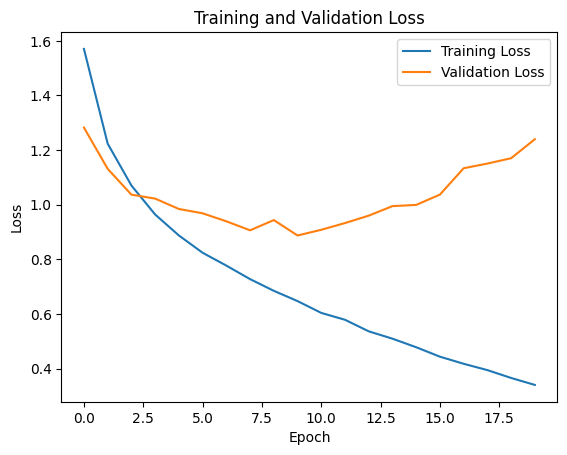

In [3]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()